<a href="https://colab.research.google.com/github/HiroshiATakano/QC_Kentei/blob/main/QCKentei_2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Métodos de recopilación y resumen de datos

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
def ensure_and_move_to_folder(folder_name):
  current_dir = os.getcwd()
  target_path = os.path.join(current_dir, folder_name)

  if not os.path.exists(target_path):
    os.makedirs(target_path)
    print(f"Folder '{folder_name}' created successfully.")
  else:
    print(f"Folder '{folder_name}' already exists.")

  #os.chdir(target_path)

In [ ]:
import os
import glob

folder_name = 'QC_Kentei'
ensure_and_move_to_folder(folder_name)

path = os.getcwd()

try:
  os.chdir(path + '/drive/My Drive/QC_Kentei')
except:
  pass

os.getcwd()

Folder 'QC_Kentei' already exists.


'/content/drive/My Drive/QC_Kentei'

In [ ]:
folder_name = 'Data_2'
ensure_and_move_to_folder(folder_name)

Folder 'Data_2' already exists.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import japanize_matplotlib
import gspread

from google.colab import auth
auth.authenticate_user()

from google.auth import default
creds, _ = default()
gc = gspread.authorize(creds)

from gspread_dataframe import get_as_dataframe, set_with_dataframe

## 01-01 Población y muestra

### 1. Tipos de datos

#### (1) Datos de medición (Valores cuantitativos continuos)
* Son datos obtenidos mediante la medición
* Pueden tomar valores continuos

#### (2) Datos de conteo (Valores cuantitativos discritos)
* Son datos obtenidos mediante el conteo.
* Son discretos y toman valores discontinuos.

#### (3) Datos categóricos
* Datos categóticos puros
* Datos categóricos ordinales

#### (4) Datos ordinales
* Datos ordinales
* Datos lingüisticos





### 2. Población y muestra
* Población
* Muestra
* Muestreo
* Población infinita
* Población finita

### 3. Estadisticos básicos
* Estadístico
* Estadístico descriptivos
* Distribución

#### (1) Estadisticos básicos que representan el centro de la distribución
1. Media $ \bar{x} $
* Media = Suma de los datos / Número de los datos
2. Mediana
* El valor central cuando los datos se ordenan por tamaño
3. Moda
* El valor que aparece con mayor frecuencia en los datos

#### (2) Estadísticos básicos que representan la variabilidad de la distribución
1. Suma de los cuadrados $ S $
* $ S = (x_1 - \bar{x} )^2  + (x_2 - \bar{x})^2 $
  $ + ... + (x_n - \bar{x})^2 $
  $ = \sum (x_i - \bar{x})^2 $
2. Varianza $ V $
* $ V = S / (n-1) = \sum(x_i -\bar{x})^2 / (n-1) $
3. Desviación estándar $ s $
* $ s = \sqrt{V} = \sqrt{S - (n-1)}$
4. Rango $ R $
* $ R = x_{max} - x_{min} $
5. Cuartiles
* Los cuartiles son el 25% y el 75% de la distribución
* Rango intercuartílico = Tercer cuartil - Primer cuartil
6. Coeficiente de variación $ CV $
* $ CV = s / \bar{x} \times 100 $ (%)


## 1-1

下記の１５個のデータについて、モード、第一四分位数、第３四分位数、四分位範囲を求めよ。


Determina la moda, el primer cuartil, el tercer cuartil y el rango intercuartilico para los giguientes 15 datos.






In [ ]:
url = "https://docs.google.com/spreadsheets/d/1Ma7ehT4TAnkUwJjspP-C3mwJA1hYmbJr8B9GJSFI0lU/edit?usp=sharing"
ss = gc.open_by_url(url)

# Obtener los datos (como lista)
st = ss.worksheet("Sheet16")
list_of_lists = st.get_all_values()

df = pd.DataFrame.from_records(list_of_lists)
df.columns = df.iloc[0]
df = df.drop(index=0)

df = df.apply(pd.to_numeric)

df.to_excel("Data_2/1_1.xlsx",index=False)

data = df['Data'].to_numpy()

data

array([ 9, 10, 10, 10, 12, 15, 26, 26, 26, 26, 33, 33, 35, 40, 42])

Moda (valor más frecuente): 26
Primer cuartil (Q1): 11.0
Tercer cuartil (Q3): 33.0
Rango intercuartilico (IQR): 22.0


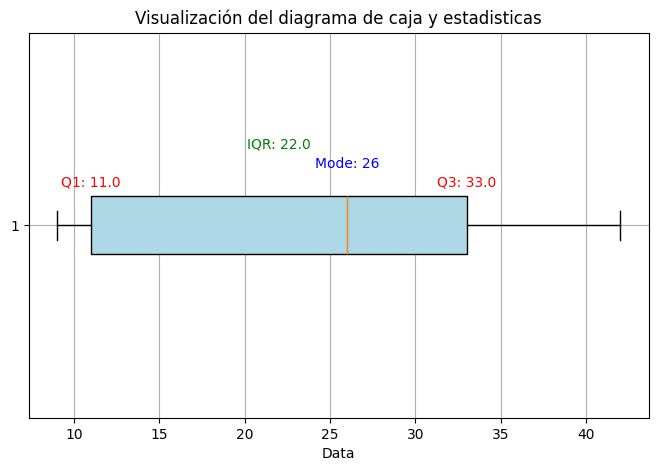

In [ ]:
import scipy.stats as stats

# Moda (valor más frecuente)
mode_value = stats.mode(data, keepdims=True)[0][0]

# Cuartiles y rango intercuartilico
Q1 = np.percentile(data, 25)  # Primer cuartil (Q1)
Q3 = np.percentile(data, 75)  # Tercer cuartil (Q3)
IQR = Q3 - Q1  # Rango intercuartilico (IQR)

# Visualización de resultados
print(f"Moda (valor más frecuente): {mode_value}")
print(f"Primer cuartil (Q1): {Q1}")
print(f"Tercer cuartil (Q3): {Q3}")
print(f"Rango intercuartilico (IQR): {IQR}")

# Creación del diagrama de caja
plt.figure(figsize=(8, 5))
box = plt.boxplot(data, vert=False, patch_artist=True, boxprops=dict(facecolor="lightblue"))

# Adición de anotaciones
plt.text(Q1, 1.1, f"Q1: {Q1}", horizontalalignment='center', color='red')
plt.text(Q3, 1.1, f"Q3: {Q3}", horizontalalignment='center', color='red')
plt.text(mode_value, 1.15, f"Mode: {mode_value}", horizontalalignment='center', color='blue')
plt.text((Q1 + Q3) / 2, 1.2, f"IQR: {IQR}", horizontalalignment='center', color='green')

# Ejes y titulo
plt.title("Visualización del diagrama de caja y estadisticas")
plt.xlabel("Data")
plt.grid(True)
plt.show()




#### (3) Índice de capaciadad del proceso (Cpk)

* La capacidad de un proceso para producir productos de calidad se llama capacidad del proceso.
* Como métode para evaluar la capacidad del proceso, se utiliza el índice de capacidad del proceso $ C_{p} $, que representa la ralación entre la variabilidad del proceso y el range de las especificaciones del producto.
* Índice de capacidad del proceso para especificaciones bilaterales $ C_p = (S_U - S_L) / 6s $
* Índice de capacidad del proceso para especificación inferior $ C_p = (\bar{x}- S_L ) / 3s $
* Índice de capacidad del proceso para especificación superior $ C_p = (S_U - \bar{x}) / 3s $
* Índice capacidad del proceso considerando el sesgo: Tomar el valor más pequeño entre $ C_{pk} = (\bar{x} - S_L)/3s $ o $ C_{pk} = (S_U - \bar{x}) / 3s $

## 01-02 Tipos y características del muestreo

### 1. Muestreo alieatorio
* Muestra de manera que todos los elementos que componen la población tengan la misma probabilidad de ser seleccionados como muestra.

### 2. Muestreo en dos etapas
* Es un método de muestreo en dos etapas, donde la población está dividida en unidades primarias. Primero se realiza un muestreo aleatorio de las unidades primarias y luego, se realiza un muestreo aleatorio de las unidades secundarias dentro de las unidades primarias seleccionadas para realizar la investigación.

### 3. Muestreo estratificado
* Cuando una población está compuesta por varias partes heterogéneas, el muestreo estratificado divide la población en esas partes (unidades primarias) y, de cada estrato (unidad primaria), se realiza un muestreo aleatorio de unidades secundarias para llevar a cabo la investigación.

### 4. Muestreo por conglomerados
* Es un método en el que, cuando la población está dividida en unidades primarias, se realiza un muestreo aleatorio de las unidades primarias y luego se investigan todas las unidades secundarias contenidas en las unidades primarias seleccionadas.

### 5. Muestreo sistemático
* Es un método en el que se realiza un muestreo de los productos dispuestos en orden, tomando una muestra a intervalos regulares.

In [ ]:
notebook_name = 'QCKentei_2-1.ipynb'
notebook_name_html = notebook_name.replace(".ipynb",".html")

!jupyter nbconvert --to html {notebook_name}
!mv {notebook_name_html} ../html/

[NbConvertApp] Converting notebook QCKentei_2-1.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 1 image(s).
[NbConvertApp] Writing 328762 bytes to QCKentei_2-1.html


In [ ]:
import glob

# 取得したいフォルダーのパスを指定
folder_path = os.getcwd()  #

# 指定フォルダー内の `.ipynb` ファイルを取得
notebooks = glob.glob(folder_path + "/*.ipynb")

# ファイル名だけ取得
notebook_names = [os.path.basename(nb) for nb in notebooks]

for notebook_name in notebook_names:
  notebook_name_html = notebook_name.replace(".ipynb",".html")
  print(notebook_name + '  ->  ' + notebook_name_html)
  #!jupyter nbconvert --to html {notebook_name}
  #!mv {notebook_name_html} ../html/




Level2_5.ipynb  ->  Level2_5.html
Level2_11 (1).ipynb  ->  Level2_11 (1).html
Level2_10.ipynb  ->  Level2_10.html
Level2_11.ipynb  ->  Level2_11.html
Level2_12.ipynb  ->  Level2_12.html
Level2_14.ipynb  ->  Level2_14.html
Level2_15.ipynb  ->  Level2_15.html
Level3_6.ipynb  ->  Level3_6.html
Level3_7.ipynb  ->  Level3_7.html
Level3_9.ipynb  ->  Level3_9.html
Level3_12.ipynb  ->  Level3_12.html
Level4_8.ipynb  ->  Level4_8.html
Level2_4.ipynb  ->  Level2_4.html
Level2_16.ipynb  ->  Level2_16.html
Level2_2.ipynb  ->  Level2_2.html
Level2_13.ipynb  ->  Level2_13.html
Level3_10.ipynb  ->  Level3_10.html
Level1_10.ipynb  ->  Level1_10.html
QCKentei_1-10.ipynb  ->  QCKentei_1-10.html
QCKentei_1-3.ipynb  ->  QCKentei_1-3.html
QCKentei_1-4.ipynb  ->  QCKentei_1-4.html
QCKentei_1-5.ipynb  ->  QCKentei_1-5.html
QCKentei_1-6.ipynb  ->  QCKentei_1-6.html
QCKentei_1-8.ipynb  ->  QCKentei_1-8.html
QCkentei_1-7.ipynb  ->  QCkentei_1-7.html
QCKentei_1-9.ipynb  ->  QCKentei_1-9.html
Level1_2.ipynb  ->  